In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [56]:
birth_rate_df = pd.read_csv('birth_rate.csv')
birth_rate_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,2.117000,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.808821,4.739863,4.677619,4.615671,4.570410,4.527707,4.482899,4.416902,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.696000,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,NaN,NaN
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.506350,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,NaN,NaN
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.953000,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,NaN,NaN


In [57]:
# Strip whitespace from column names and replace with underscores
birth_rate_df.columns = birth_rate_df.columns.str.strip().str.replace(' ', '_')
birth_rate_df.head()


,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed:_66
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,2.117000,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.808821,4.739863,4.677619,4.615671,4.570410,4.527707,4.482899,4.416902,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.696000,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,NaN,NaN
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.506350,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,NaN,NaN
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.953000,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,NaN,NaN


In [58]:
birth_rate_df.drop(['Indicator_Code', 'Indicator_Name', '2021', 'Unnamed:_66'], axis=1, inplace=True)
birth_rate_df.head()

,Country_Name,Country_Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,...,1.962000,2.028000,2.117000,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000
1,Africa Eastern and Southern,AFE,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,6.810571,6.818612,...,4.962611,4.879018,4.808821,4.739863,4.677619,4.615671,4.570410,4.527707,4.482899,4.416902
2,Afghanistan,AFG,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,7.320000,7.339000,...,5.958000,5.830000,5.696000,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000
3,Africa Western and Central,AFW,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,6.564967,6.589806,...,5.645672,5.580892,5.506350,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329
4,Angola,AGO,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,7.194000,7.267000,...,6.120000,6.039000,5.953000,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000


In [59]:
# Convert the columns 1960 to 2020 to one column year
birth_rate_df = pd.melt(birth_rate_df, id_vars=['Country_Name', 'Country_Code'], var_name='Year', value_name='Birth_Rate')
birth_rate_df.head()

,Country_Name,Country_Code,Year,Birth_Rate
0,Aruba,ABW,1960,4.820000
1,Africa Eastern and Southern,AFE,1960,6.724125
2,Afghanistan,AFG,1960,7.282000
3,Africa Western and Central,AFW,1960,6.458448
4,Angola,AGO,1960,6.708000


In [60]:
# Sort by Country_Name
birth_rate_df.sort_values(by=['Country_Name', 'Year'])

,Country_Name,Country_Code,Year,Birth_Rate
2,Afghanistan,AFG,1960,7.282
268,Afghanistan,AFG,1961,7.284
534,Afghanistan,AFG,1962,7.292
800,Afghanistan,AFG,1963,7.302
1066,Afghanistan,AFG,1964,7.304
...,...,...,...,...
15161,Zimbabwe,ZWE,2016,3.771
15427,Zimbabwe,ZWE,2017,3.706
15693,Zimbabwe,ZWE,2018,3.659
15959,Zimbabwe,ZWE,2019,3.599


In [61]:
birth_rate_df.to_csv('./data_clean/birth_rate_clean.csv', index=False)

In [62]:
test = pd.read_csv('./data_clean/birth_rate_clean.csv')
test.head()

,Country_Name,Country_Code,Year,Birth_Rate
0,Aruba,ABW,1960,4.820000
1,Africa Eastern and Southern,AFE,1960,6.724125
2,Afghanistan,AFG,1960,7.282000
3,Africa Western and Central,AFW,1960,6.458448
4,Angola,AGO,1960,6.708000


In [63]:
import plotly.express as px
import plotly.graph_objects as go

# use the choropleth mapbox trace type in plotly express
fig = px.choropleth(birth_rate_df, locations='Country_Code', color='Birth_Rate', 
                    animation_frame='Year',  # add animation slider
                    hover_name='Country_Name', range_color=[0,4],)


# Remove antarctica
fig.update_geos(fitbounds="locations", visible=False, showframe=False)

# show the figure
fig.update_layout(width=1000, height=800, title='Birth Rate by Country (1960-2020)')



In [64]:
median_age_df = pd.read_csv('median-age.csv')
median_age_df.head()

,Entity,Code,Year,Median age - Sex: all - Age: all - Variant: estimates,Median age - Sex: all - Age: all - Variant: medium
0,Afghanistan,AFG,1950,18.4,NaN
1,Afghanistan,AFG,1951,18.4,NaN
2,Afghanistan,AFG,1952,18.4,NaN
3,Afghanistan,AFG,1953,18.3,NaN
4,Afghanistan,AFG,1954,18.3,NaN


In [65]:
median_age_columns = median_age_df.columns
median_age_df['median_age'] = median_age_df[median_age_columns[3]]
median_age_df.drop(median_age_columns[3:5], axis=1, inplace=True)
median_age_df.head()

,Entity,Code,Year,median_age
0,Afghanistan,AFG,1950,18.4
1,Afghanistan,AFG,1951,18.4
2,Afghanistan,AFG,1952,18.4
3,Afghanistan,AFG,1953,18.3
4,Afghanistan,AFG,1954,18.3


In [66]:
median_age_df = median_age_df[median_age_df.Year < 2022]
median_age_df.head()

,Entity,Code,Year,median_age
0,Afghanistan,AFG,1950,18.4
1,Afghanistan,AFG,1951,18.4
2,Afghanistan,AFG,1952,18.4
3,Afghanistan,AFG,1953,18.3
4,Afghanistan,AFG,1954,18.3


In [106]:
median_age_df[(median_age_df.Year >= 1960) & (median_age_df.Code == 'CHE')].to_csv('./data_clean/median_age_switzerland.csv', index=False)

In [107]:
test = pd.read_csv('./data_clean/median_age_switzerland.csv')
test.head()

,Entity,Code,Year,median_age
0,Switzerland,CHE,1960,31.6
1,Switzerland,CHE,1961,31.3
2,Switzerland,CHE,1962,30.9
3,Switzerland,CHE,1963,30.7
4,Switzerland,CHE,1964,30.5


In [111]:
px.line(test, x='Year', y='median_age')

In [67]:
import plotly.express as px
import plotly.graph_objects as go

# use the choropleth mapbox trace type in plotly express
fig = px.choropleth(median_age_df, locations='Code', color='median_age', 
                    animation_frame='Year',  # add animation slider
                    hover_name='Entity', range_color=[0,65],)


# Remove antarctica
fig.update_geos(fitbounds="locations", visible=False, showframe=False)

# show the figure
fig.update_layout(width=1000, height=800, title='Median Age by Country (1960-2020)')


In [68]:
swiss_pyramid = pd.read_csv('./Switzerland-2021.csv')
swiss_pyramid.head()

,Age,M,F
0,0-4,223985,212509
1,5-9,227226,214300
2,10-14,221517,209884
3,15-19,216231,204080
4,20-24,244226,228306


In [72]:
swiss_pyramid['M'] = -swiss_pyramid['M']
swiss_pyramid.head()

,Age,M,F
0,0-4,223985,212509
1,5-9,227226,214300
2,10-14,221517,209884
3,15-19,216231,204080
4,20-24,244226,228306


In [95]:
import plotly.express as px

fig = px.bar(orientation='h', y=swiss_pyramid['Age'], x=-swiss_pyramid['M'], )

layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-400_000, 400_000],
                       tickvals=[-300_000, -200_000, -100_000, 0, 100_000, 200_000, 300_000],
                       ticktext=[300_000, 200_000, 100_000, 0, 100_000, 200_000, 300_000],
                       title='Number'),
                   barmode='overlay',
                   bargap=0.1)
fig.update_layout(layout)

fig.add_trace(go.Bar(orientation='h', y=swiss_pyramid['Age'], x=swiss_pyramid['F'], showlegend=False))


fig.show()

In [47]:
import pandas as pd

child_survey = pd.read_csv('./ChildlessnessNJ.csv')
child_survey.head()

,Gender,Age,Employment Status,Race/Ethnicity,Relationship Status,Currently have children,Q1,Q2,Q3,Q4,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30
0,Female,19,Student,African American,"Single, but not in a relationship",No,5,2,5.0,5,...,3.0,5.0,2.0,5.0,2.0,2.0,3.0,1.0,4.0,3.0
1,Female,27,Currently unemployed,African American,"Single, but not in a relationship",No,4,4,5.0,5,...,3.0,4.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0
2,Female,27,Employee,Haitian-American,"Single, but not in a relationship",No,1,1,4.0,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0
3,Female,45,Employee,Haitian-American,Married,Yes,2,2,4.0,4,...,1.0,1.0,3.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0
4,Female,31,Employee,African American,Married,Yes,3,3,5.0,3,...,2.0,1.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0


In [51]:
# Choose last 30 columns
child_survey_without_q7 = child_survey.iloc[:, -30:]
child_survey_without_q7['Q7'] = 0

child_survey_avg = pd.DataFrame(columns=child_survey_without_q7.columns, data=[child_survey_without_q7.mean()])
child_survey_avg.head()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30
0,3.119048,3.222222,3.32,3.293651,3.301587,3.047619,0.0,4.634146,3.516129,1.483871,...,2.024194,2.774194,2.08871,2.733871,1.766129,1.733871,2.217742,2.282258,1.903226,2.0


In [52]:
child_survey_avg.to_csv('./data_clean/child_survey_mean.csv', index=False)

In [156]:
question_mean = pd.read_csv('./data_clean/child_survey_mean.csv', header=None)

pd.DataFrame({'Question': child_survey_without_q7.columns, 'Mean': question_mean.T[1]}).to_csv('./data_clean/child_survey_mean.csv', index=False)

In [158]:
question_mean = pd.read_csv('./data_clean/child_survey_mean.csv')
px.bar(question_mean, x='Question', y='Mean', title='Mean of Questions')

In [174]:
questions = pd.read_csv('./ChildlessnessQuestions.csv'm index_col='Question Code')
questions

In [176]:
question_mean = pd.read_csv('./data_clean/child_survey_mean.csv')
fig = px.bar(question_mean.T, x=0, y='1', title='Average of answers to questions')

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] but received: 1

In [178]:
questions = pd.read_csv('./data_clean/childlessness_questions.csv', index_col='Question Code')
questions

,Full Question,Construct Name
Question Code,,
Q1,Women choose not to have a child because they ...,Financial
Q2,Women choose not to have a child because it is...,Financial
Q3,Women who choose not to have a child due to fi...,Financial
Q4,Women in high income jobs choose not to have a...,Financial
Q5,"Childless women, who are infertile, choose not...",Financial
Q6,Single women choose not to have a child becaus...,Financial
Q7,How have financial considerations influenced y...,Financial
Q8,It is perfectly reasonable for a woman to choo...,Choice
Q9,"If a woman chooses not to have a child, societ...",Choice


In [120]:
test = pd.read_csv('./data_clean/child_survey_mean.csv')
test.head().T[0]

Q1     3.119048
Q2     3.222222
Q3     3.320000
Q4     3.293651
Q5     3.301587
Q6     3.047619
Q7     0.000000
Q8     4.634146
Q9     3.516129
Q10    1.483871
Q11    0.080645
Q12    4.564516
Q13    2.387097
Q14    3.008065
Q15    3.072581
Q16    2.096774
Q17    2.806452
Q18    4.072581
Q19    3.475806
Q20    3.629032
Q21    2.024194
Q22    2.774194
Q23    2.088710
Q24    2.733871
Q25    1.766129
Q26    1.733871
Q27    2.217742
Q28    2.282258
Q29    1.903226
Q30    2.000000
Name: 0, dtype: float64

<AxesSubplot:>

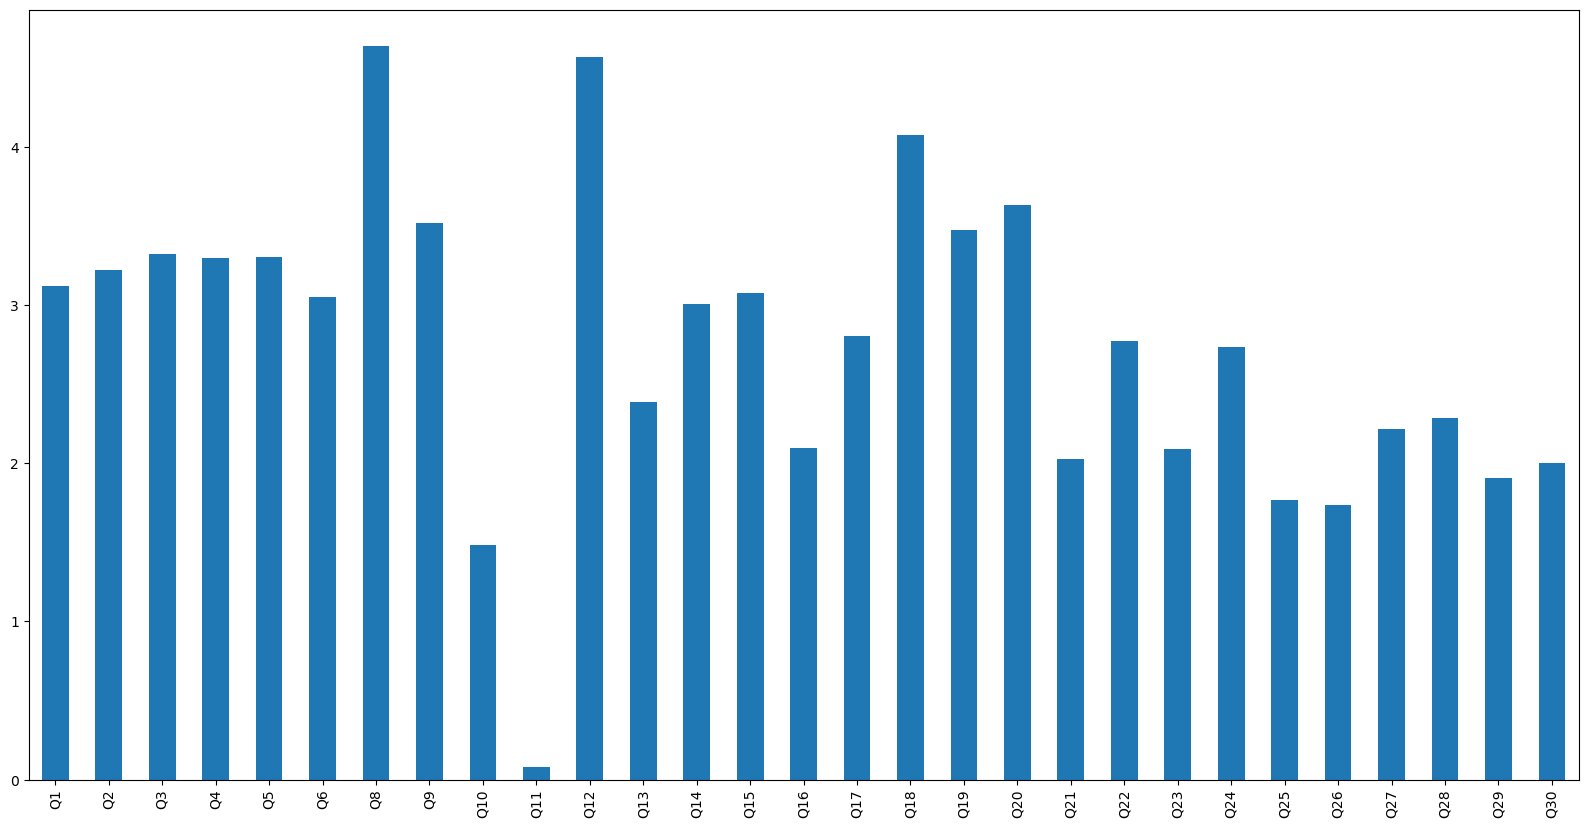

In [31]:
child_survey_without_q7.mean().plot(kind='bar', figsize=(20,10))

In [12]:

child_survey_qas = pd.read_csv('./ChildlessnessQuestions.csv')
child_survey_qas

,Question Code,Full Question,Construct Name
0,Q1,Women choose not to have a child because they ...,Financial
1,Q2,Women choose not to have a child because it is...,Financial
2,Q3,Women who choose not to have a child due to fi...,Financial
3,Q4,Women in high income jobs choose not to have a...,Financial
4,Q5,"Childless women, who are infertile, choose not...",Financial
5,Q6,Single women choose not to have a child becaus...,Financial
6,Q7,How have financial considerations influenced y...,Financial
7,Q8,It is perfectly reasonable for a woman to choo...,Choice
8,Q9,"If a woman chooses not to have a child, societ...",Choice
9,Q10,"If a woman chooses not to have a child, she is...",Choice


In [38]:
child_survey_qas[child_survey_qas['Question Code'] == 'Q8']

,Question Code,Full Question,Construct Name
7,Q8,It is perfectly reasonable for a woman to choo...,Choice


In [9]:
print(len(child_survey))
print(len(child_survey[child_survey['Currently have children'] == 'Yes']))
print(len(child_survey[(child_survey['Currently have children'] == 'Yes') & (child_survey['Relationship Status'] == 'Married')]))


126
51
43


In [96]:
life_expectancy_df = pd.read_csv('life-expectancy.csv')
life_expectancy_df.head()

,Entity,Code,Year,Life expectancy at birth (historical)
0,Afghanistan,AFG,1950,27.7
1,Afghanistan,AFG,1951,28.0
2,Afghanistan,AFG,1952,28.4
3,Afghanistan,AFG,1953,28.9
4,Afghanistan,AFG,1954,29.2


In [101]:
life_expectancy_df[(life_expectancy_df['Code'] == 'CHE') & (life_expectancy_df['Year'] >= 1960)].to_csv('./data_clean/life_expectancy_switzerland.csv', index=False)

In [102]:
px.line(life_expectancy_df[(life_expectancy_df['Code'] == 'CHE') & (life_expectancy_df['Year'] >= 1960)], x='Year', y='Life expectancy at birth (historical)', title='Life Expectancy in Switzerland (1960-2020)')

In [103]:
life_expectancy_df_switzerland = pd.read_csv('./data_clean/life_expectancy_switzerland.csv')
life_expectancy_df_switzerland.head()

,Entity,Code,Year,Life expectancy at birth (historical)
0,Switzerland,CHE,1960,71.4
1,Switzerland,CHE,1961,71.7
2,Switzerland,CHE,1962,71.3
3,Switzerland,CHE,1963,71.3
4,Switzerland,CHE,1964,72.2


# Data links:
survey, childlessness:
https://www.kaggle.com/datasets/rkkaggle2/social-attitudes-regarding-childlessness-nj-survey


Population pyramid data:
https://www.populationpyramid.net/switzerland/2021/

birth rate data:
https://data.worldbank.org/indicator/SP.DYN.TFRT.IN

# Introduction
Imagine a world where the rhythm of life is changing. Where the joyous cries of newborns become less frequent, and the sound of children playing in the streets grows faint. This is the reality we face today, a world grappling with declining birth rates. </br>

Being in Switzerland born, raised by Filipino parents, 22-year old, gen-Z male. I have noticed many generational and cultural differences between my parents time in the philippines and 
my time in Switzerland regarding family sizes. Both my parents are from the generation X and their family sizes seem completely poles apart compared to my generation. At family sizes from 7 to 10
children, I would suppose that there were numerous reasons and events that had happened during this timeframe of 60 years. </br>

I asked myself, has the birthrate during this time decreased? Should there be a decline, is it because generational or cultural reasons? And how would it affect the future?

# Consistent birthrate declination
To answer my first question, it is interesting to observe the birthrate evolution on a global scale. I discovered a consistent pattern of declining birth rates worldwide. This phenomenon is not limited to a particular region or culture; it is a global trend that has been observed over the past few decades.

Examining data from various countries, it is found that birth rates have been steadily decreasing, resulting in smaller family sizes. The statistics reveal a significant shift in demographic patterns that has far-reaching implications for societies across the globe.

Moreover, this decline in birth rates is not confined to developed nations. Even in regions that historically had higher birth rates, such as Africa and the Philippines, there has been a noticeable downward trend. The reasons behind this decline may vary, but the overall pattern remains consistent: fewer children are being born worldwide.

# Possible reasons for the decline
Understanding the reasons behind the declining birth rates is crucial to gaining insight into this global phenomenon. Several factors contribute to this trend, and they often intertwine in complex ways:

In a survey conducted by graduate researchers from Rider University in Lawrenceville NJ where they asked questions towards unmarried and married women on childlessness. 
The researchers asked 30 questions in the fields financial, choice, outside influences and health. Each question is rated between 1 and 5 indicating how true and significant it is.

Financial Factors:
The survey indicates that financial considerations play a significant role in women's decision-making about having children. Regarding the financial questions, all received relatively high ratings, suggesting that financial stability, the cost of raising children, and the financial judgment faced by women who choose not to have children are important factors influencing their decisions.

Choice and Societal Perception:
Questions related to choice and societal perception also received notable ratings. It is evident that women's decisions about having children are influenced by the perception of society and the judgments they may face. While the majority agreed that it is reasonable for a woman to choose not to have a child, there were varying opinions about societal perception and the perceived impact of a woman's decision on her value and character.

External Influences:
External influences, including family, religion, and peer pressure, were acknowledged but received somewhat lower ratings. While these factors play a role, they appear to have a slightly lesser impact on women's decisions compared to financial and choice-related factors.

Health Considerations:
Health concerns received mixed ratings. Some questions indicated that health risks and age-related fertility decline were recognized as factors influencing women's decisions about having children, albeit not to a significant extent.

# Future consequences
As birth rates decline, the average age of the population increases. This demographic shift poses challenges for healthcare systems, pension programs, and social welfare services. The proportion of older adults grows, putting pressure on the working-age population to support the elderly.


A shrinking workforce can lead to economic slowdowns and reduced productivity. With fewer young people entering the labor market, there may be a shortage of skilled workers in various industries. This can hinder economic growth and innovation. The continuing decline in birth rates will inevitably bring about cultural and social transformations. With smaller family sizes becoming the norm, societal structures and dynamics will undergo significant changes. With fewer children being born, the transmission of cultural practices, languages, and values may be at risk. This can lead to a loss of cultural diversity and potentially reshape societal norms and identities.

# What can we do against it? And what have we already done?

Addressing the challenges posed by declining birth rates requires a multifaceted approach that encompasses social, economic, and policy interventions. Here are some strategies that have been implemented or proposed to mitigate the consequences and encourage sustainable birth rates:

Family-Friendly Policies: Governments can implement policies that support families, such as parental leave, flexible work arrangements, and affordable childcare. These measures can alleviate the financial and logistical burdens associated with raising children, making it more feasible for individuals to start families:

In the case of Switzerland in the year of 2020, the people voted that fathers are allowed to have a 2 week paid parental leave that one take during the first six months after the baby has been born.

And in the events of Japan, the government has decided to double the monthly child allowance from 5'000 ¥ to 10'000 ¥.

# Conclusion

In conclusion, the global decline in birth rates presents both challenges and opportunities. By understanding the underlying factors, acknowledging the potential consequences, and implementing comprehensive strategies, we can strive for a sustainable balance that preserves the fabric of our societies, empowers individuals, and embraces the changes of the future.

In [ ]:
import streamlit 